## DUE DATE: Thursday, June 28, 2018

# Predicting the Amount of Money Spent on Insured Customers 

### For this assignment, we will be analyzing insured customers' data for an insurance company:
**Based on a sample data that consists of the profile of insured customers, we want to be able to predict the dollar amount of money spent by the insurance company on insured customers.**

### Insured ustomers' Data
The insured customers' data is in a csv file. It has information sconsisting of:
1. age
2. sex (female, male)
3. BMI
4. Children
5. Smoker (yes, no)
6. Region (northeast, northwest, southeast, southwest])
7. **expenses**

The value we want to predict is **expenses**


## 1. Import the Libraries:
1. numpy
2. matplotlib.pyplot
3. pandas

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 2. Read the csv file: "insurance.csv"

In [10]:
a = pd.read_csv("insurance.csv")

## 3. Show a sample of the data (first 10 rows)

In [11]:
a.head(10)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


## 4. Show some statistics about the data

In [12]:
a.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


## 5. Show info about the data

In [13]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
expenses    1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


## 6. Convert the columns with text data into numeric data

In [17]:
a["southwest"]=a["region"]
a["southwest"].replace(["southwest","southeast","northwest","northeast"],[1,0,0,0],inplace=True)
a["southeast"]=a["region"]
a["southeast"].replace(["southwest","southeast","northwest","northeast"],[0,1,0,0],inplace=True)
a["northwest"]=a["region"]
a["northwest"].replace(["southwest","southeast","northwest","northeast"],[0,0,1,0],inplace=True)
a["northeast"]=a["region"]
a["northeast"].replace(["southwest","southeast","northwest","northeast"],[0,0,0,1],inplace=True)
a["female"]=a["sex"]
a["female"].replace(["female","male"],[1,0],inplace=True)
a["male"]=a["sex"]
a["male"].replace(["female","male"],[0,1],inplace=True)
a["yes"]=a["smoker"]
a["yes"].replace(["yes","no"],[1,0],inplace=True)
a["no"]=a["smoker"]
a["no"].replace(["yes","no"],[0,1],inplace=True)

a
a.head(10)

,age,sex,bmi,children,smoker,region,expenses,southwest,southeast,northwest,northeast,female,male,yes,no
0,19,female,27.9,0,yes,southwest,16884.92,1,0,0,0,1,0,1,0
1,18,male,33.8,1,no,southeast,1725.55,0,1,0,0,0,1,0,1
2,28,male,33.0,3,no,southeast,4449.46,0,1,0,0,0,1,0,1
3,33,male,22.7,0,no,northwest,21984.47,0,0,1,0,0,1,0,1
4,32,male,28.9,0,no,northwest,3866.86,0,0,1,0,0,1,0,1
5,31,female,25.7,0,no,southeast,3756.62,0,1,0,0,1,0,0,1
6,46,female,33.4,1,no,southeast,8240.59,0,1,0,0,1,0,0,1
7,37,female,27.7,3,no,northwest,7281.51,0,0,1,0,1,0,0,1
8,37,male,29.8,2,no,northeast,6406.41,0,0,0,1,0,1,0,1
9,60,female,25.8,0,no,northwest,28923.14,0,0,1,0,1,0,0,1


## 7. Based on this data, what looks to be the most correlated feature with "Expenses"? (Justify your answer)

In [19]:
According to the data, age is the most correlated feature with expenses.

## 8. Refer to the customers features data by "X", and refer to the label feature (expenses) by "y" 

In [22]:
a.columns
y=a['expenses']
X=a[['age','female','male','bmi','children','southwest','southeast','northwest','northeast']]

## 9. Load the train_test_split function

In [23]:
from sklearn.model_selection import train_test_split

## 10. Split the data into:
1. a **training** data set, and
2. a **test** data set. 

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=38)

## 11. Import LinearRegression from sklearn.linear_model and create an instance of a LinearRegression() model named

In [41]:
from sklearn.linear_model import LinearRegression

## 12. Fit the model to the training data

In [42]:
pq = LinearRegression()
pq.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 13. Print the linear model's intercept and coefficients

In [43]:
print(pq.intercept_, pq.coef_)

-8655.747461558827 [  238.58246175  -351.91188889   351.91188889   384.19897208
   995.30138258 -1379.98363871  1083.64310439  -889.83292296
  1186.17345729]


## 14. Use the trained model to predict the test data set

In [44]:
prediction=pq.predict(X_test)

## 15. Create a scatterplot of the real test values versus the predicted values.

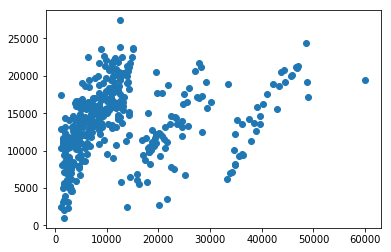

In [45]:
plt.scatter(y_test,prediction)

## 16. Calculate: 
1. the Mean Absolute Error, 
2. Mean Squared Error, and 
3. the Root Mean Squared Error.

In [46]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 8836.507878279252
MSE: 117628616.35397168
RMSE: 10845.67270177243


## 17. Show a histogram of the difference between the actual and predicted value of the test data set.

(array([ 31., 180.,  86.,  13.,  45.,   9.,  11.,  24.,   2.,   1.]),
 array([-16311.79726061, -10623.81635455,  -4935.83544848,    752.14545758,
          6440.12636364,  12128.1072697 ,  17816.08817576,  23504.06908183,
         29192.04998789,  34880.03089395,  40568.01180001]),
 <a list of 10 Patch objects>)

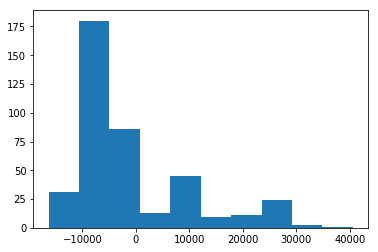

In [47]:
plt.hist(y_test-prediction)

## 18. Explain the meaning behind the coefficients of the model

In [ ]:
the direct relationship between two numerical variables x and y

## 19. Use your own implementation of the Batch Gradient Descent to find the intercept and coeficients of the linear regression model

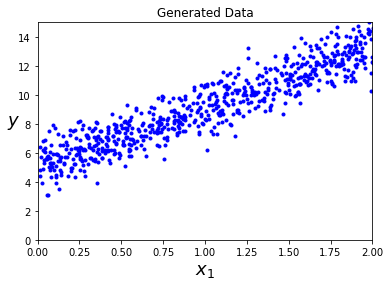

[[nan]
 [nan]]


C:\Users\yasht\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in subtract


In [52]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
X = 3 * np.random.rand(1000, 1)
y = 5 + 4 * X + np.random.randn(1000, 1)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.title("Generated Data")
plt.show()
X_b = np.c_[np.ones((1000, 1)), X]
alpha = 0.1
n_iterations = 1000
m = 100
W = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 1/m * X_b.T.dot(X_b.dot(W) - y)
    W = W - alpha * gradients
print(W)
def plot_gradient_descent(W, alpha):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            	y_predict = X_test_b.dot(W)
            	style = "b-" if iteration > 0 else "r--"
            	plt.plot(X_test, y_predict, style)
        gradients = 1/m * X_b.T.dot(X_b.dot(W) - y)
        W = W - alpha * gradients
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\alpha = {}$".format(alpha), fontsize=16)

## 20. Demonstrate the effect of using different Learning Rate Parameter

C:\Users\yasht\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in subtract


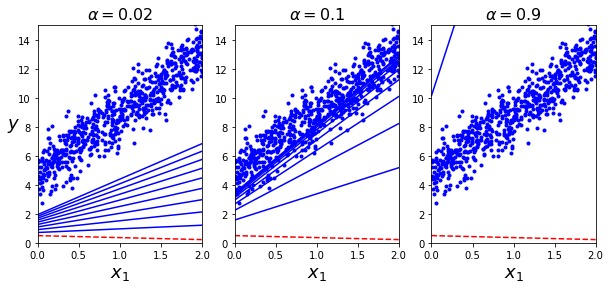

In [49]:
np.random.seed(42)
W = np.random.randn(2,1)
X_test = np.array([[0], [2]])
X_test_b = np.c_[np.ones((2, 1)), X_test]
plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(W, alpha=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(W, alpha=0.1)
plt.subplot(133); plot_gradient_descent(W, alpha=0.9)
plt.show()

## 21. Compare your results from #19 and #13

## 22. Substitute the Stochastic Gradient Descent for the BGD. Compare results with Question 19

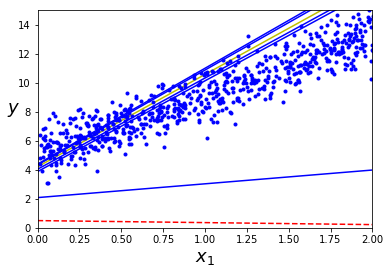

In [53]:
m = len(X_b)
np.random.seed(42)
alpha = 0.1
W = np.random.randn(2,1)
for i in range(1000):
       if i < 7:
             y_predict = X_test_b.dot(W)
             style = "b-" if i > 0 else "r--"
             if i == 6: style = "y-" 
             plt.plot(X_test, y_predict, style) 
       random_index = np.random.randint(m)
       xi = X_b[random_index:random_index+1]
       yi = y[random_index:random_index+1]
       gradients = 2 * xi.T.dot(xi.dot(W) - yi)
       W = W - alpha * gradients      # end of for loop
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18) 
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15]) 
plt.show()

## 23. Use the Mini Batch Gradient Descent and compare with 19 and 22

In [54]:
n_iterations = 100
minibatch_size = 20
alpha = 0.1
np.random.seed(42)
W = np.random.randn(2,1)
shuffled_indices = np.random.permutation(m)
X_b_shuffled = X_b[shuffled_indices]
y_shuffled = y[shuffled_indices]
for j in range(n_iterations):
    for i in range(0, m, minibatch_size):
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 1/minibatch_size * xi.T.dot(xi.dot(W) - yi)
        W = W - alpha * gradients
        print(W)

[[1.61567203]
 [2.00296957]]
[[2.20959241]
 [2.99611367]]
[[2.67058796]
 [3.76768272]]
[[2.95780213]
 [4.15168658]]
[[3.13258363]
 [4.32988477]]
[[3.29337218]
 [4.53691268]]
[[3.38690316]
 [4.64094853]]
[[3.45087994]
 [4.71437234]]
[[3.5275406]
 [4.7774131]]
[[3.54869902]
 [4.78136366]]
[[3.56021497]
 [4.73703878]]
[[3.56735747]
 [4.68256157]]
[[3.6297757 ]
 [4.68909209]]
[[3.66813757]
 [4.68698969]]
[[3.7197326 ]
 [4.72542834]]
[[3.72191457]
 [4.7154799 ]]
[[3.69730308]
 [4.62523685]]
[[3.72172545]
 [4.60370233]]
[[3.7443518 ]
 [4.56706452]]
[[3.79436472]
 [4.59076634]]
[[3.84377021]
 [4.59730976]]
[[3.88704411]
 [4.63983481]]
[[3.91940566]
 [4.63705804]]
[[3.91700274]
 [4.54512894]]
[[3.94004734]
 [4.5547383 ]]
[[4.03330682]
 [4.63477963]]
[[4.05672634]
 [4.60770678]]
[[4.06303304]
 [4.56632042]]
[[4.05364791]
 [4.49730965]]
[[4.11684128]
 [4.59383638]]
[[4.10804392]
 [4.53434165]]
[[4.14246858]
 [4.53304941]]
[[4.14468115]
 [4.4934225 ]]
[[4.18767686]
 [4.51674787]]
[[4.19200126]
 [

[[5.18871539]
 [3.92684629]]
[[5.18226278]
 [3.92470935]]
[[5.18892139]
 [3.93358376]]
[[5.1948838 ]
 [3.94545775]]
[[5.17588356]
 [3.94599308]]
[[5.16865596]
 [3.93435871]]
[[5.14356321]
 [3.8935381 ]]
[[5.15293659]
 [3.89087651]]
[[5.18020222]
 [3.92729298]]
[[5.19243922]
 [3.96196516]]
[[5.15513762]
 [3.93739058]]
[[5.13095272]
 [3.89240173]]
[[5.11759063]
 [3.87254671]]
[[5.09025513]
 [3.82414107]]
[[5.13098889]
 [3.89915762]]
[[5.15198198]
 [3.91114954]]
[[5.15467145]
 [3.94850329]]
[[5.19005812]
 [4.01110611]]
[[5.16976451]
 [3.92511935]]
[[5.14249552]
 [3.91172018]]
[[5.1962914 ]
 [3.99178619]]
[[5.178812  ]
 [3.97060498]]
[[5.17248443]
 [3.9684424 ]]
[[5.16678017]
 [3.93647603]]
[[5.19143061]
 [4.03017579]]
[[5.17602789]
 [3.98751252]]
[[5.1779143 ]
 [3.97922114]]
[[5.16819053]
 [3.96333671]]
[[5.18965265]
 [4.00331854]]
[[5.18471103]
 [4.0195587 ]]
[[5.18913293]
 [4.03419503]]
[[5.13365387]
 [4.01336309]]
[[5.14409265]
 [4.01043056]]
[[5.1567153 ]
 [4.01311625]]
[[5.210305  ]


 [4.01110611]]
[[5.16976451]
 [3.92511935]]
[[5.14249553]
 [3.91172018]]
[[5.1962914 ]
 [3.99178619]]
[[5.178812  ]
 [3.97060498]]
[[5.17248443]
 [3.9684424 ]]
[[5.16678017]
 [3.93647603]]
[[5.19143061]
 [4.03017579]]
[[5.17602789]
 [3.98751252]]
[[5.17791431]
 [3.97922114]]
[[5.16819053]
 [3.96333671]]
[[5.18965265]
 [4.00331854]]
[[5.18471103]
 [4.01955869]]
[[5.18913293]
 [4.03419503]]
[[5.13365387]
 [4.01336309]]
[[5.14409265]
 [4.01043056]]
[[5.1567153 ]
 [4.01311625]]
[[5.210305  ]
 [4.11948469]]
[[5.21208521]
 [4.1081847 ]]
[[5.15359746]
 [4.00418774]]
[[5.13323913]
 [3.95501029]]
[[5.14001736]
 [3.99561392]]
[[5.14387782]
 [3.97363669]]
[[5.12154689]
 [3.92966629]]
[[5.16000707]
 [3.96954236]]
[[5.16068813]
 [3.93859755]]
[[5.15909196]
 [3.93323021]]
[[5.17823895]
 [3.95264608]]
[[5.17365317]
 [3.92420734]]
[[5.1428768 ]
 [3.89290681]]
[[5.16933716]
 [3.90265531]]
[[5.18897385]
 [3.92499161]]
[[5.16878028]
 [3.88269379]]
[[5.18871539]
 [3.92684629]]
[[5.18226278]
 [3.92470935]]

 [4.11948469]]
[[5.21208521]
 [4.1081847 ]]
[[5.15359746]
 [4.00418774]]
[[5.13323913]
 [3.95501029]]
[[5.14001736]
 [3.99561392]]
[[5.14387782]
 [3.97363669]]
[[5.12154689]
 [3.92966629]]
[[5.16000707]
 [3.96954236]]
[[5.16068813]
 [3.93859755]]
[[5.15909196]
 [3.93323021]]
[[5.17823895]
 [3.95264608]]
[[5.17365317]
 [3.92420734]]
[[5.1428768 ]
 [3.89290681]]
[[5.16933716]
 [3.90265531]]
[[5.18897385]
 [3.92499161]]
[[5.16878028]
 [3.88269379]]
[[5.18871539]
 [3.92684629]]
[[5.18226278]
 [3.92470935]]
[[5.18892139]
 [3.93358376]]
[[5.1948838 ]
 [3.94545775]]
[[5.17588356]
 [3.94599308]]
[[5.16865596]
 [3.93435871]]
[[5.14356321]
 [3.8935381 ]]
[[5.1529366 ]
 [3.89087651]]
[[5.18020222]
 [3.92729298]]
[[5.19243922]
 [3.96196515]]
[[5.15513762]
 [3.93739058]]
[[5.13095272]
 [3.89240173]]
[[5.11759063]
 [3.87254671]]
[[5.09025514]
 [3.82414107]]
[[5.13098889]
 [3.89915762]]
[[5.15198198]
 [3.91114954]]
[[5.15467145]
 [3.94850329]]
[[5.19005813]
 [4.01110611]]
[[5.16976451]
 [3.92511935]]

 [3.97363669]]
[[5.12154689]
 [3.92966629]]
[[5.16000707]
 [3.96954236]]
[[5.16068813]
 [3.93859755]]
[[5.15909196]
 [3.93323021]]
[[5.17823895]
 [3.95264608]]
[[5.17365317]
 [3.92420734]]
[[5.1428768 ]
 [3.89290681]]
[[5.16933716]
 [3.90265531]]
[[5.18897385]
 [3.92499161]]
[[5.16878028]
 [3.88269379]]
[[5.18871539]
 [3.92684629]]
[[5.18226278]
 [3.92470935]]
[[5.18892139]
 [3.93358376]]
[[5.1948838 ]
 [3.94545775]]
[[5.17588356]
 [3.94599308]]
[[5.16865596]
 [3.93435871]]
[[5.14356321]
 [3.8935381 ]]
[[5.1529366 ]
 [3.89087651]]
[[5.18020222]
 [3.92729298]]
[[5.19243922]
 [3.96196515]]
[[5.15513762]
 [3.93739058]]
[[5.13095272]
 [3.89240173]]
[[5.11759063]
 [3.87254671]]
[[5.09025514]
 [3.82414107]]
[[5.13098889]
 [3.89915762]]
[[5.15198198]
 [3.91114954]]
[[5.15467145]
 [3.94850329]]
[[5.19005813]
 [4.01110611]]
[[5.16976451]
 [3.92511935]]
[[5.14249553]
 [3.91172018]]
[[5.1962914 ]
 [3.99178619]]
[[5.178812  ]
 [3.97060498]]
[[5.17248443]
 [3.9684424 ]]
[[5.16678017]
 [3.93647603]]

 [4.01311625]]
[[5.210305  ]
 [4.11948469]]
[[5.21208521]
 [4.1081847 ]]
[[5.15359746]
 [4.00418774]]
[[5.13323913]
 [3.95501029]]
[[5.14001736]
 [3.99561392]]
[[5.14387782]
 [3.97363669]]
[[5.12154689]
 [3.92966629]]
[[5.16000707]
 [3.96954236]]
[[5.16068813]
 [3.93859755]]
[[5.15909196]
 [3.93323021]]
[[5.17823895]
 [3.95264608]]
[[5.17365317]
 [3.92420734]]
[[5.1428768 ]
 [3.89290681]]
[[5.16933716]
 [3.90265531]]
[[5.18897385]
 [3.92499161]]
[[5.16878028]
 [3.88269379]]
[[5.18871539]
 [3.92684629]]
[[5.18226278]
 [3.92470935]]
[[5.18892139]
 [3.93358376]]
[[5.1948838 ]
 [3.94545775]]
[[5.17588356]
 [3.94599308]]
[[5.16865596]
 [3.93435871]]
[[5.14356321]
 [3.8935381 ]]
[[5.1529366 ]
 [3.89087651]]
[[5.18020222]
 [3.92729298]]
[[5.19243922]
 [3.96196515]]
[[5.15513762]
 [3.93739058]]
[[5.13095272]
 [3.89240173]]
[[5.11759063]
 [3.87254671]]
[[5.09025514]
 [3.82414107]]
[[5.13098889]
 [3.89915762]]
[[5.15198198]
 [3.91114954]]
[[5.15467145]
 [3.94850329]]
[[5.19005813]
 [4.01110611]]

 [3.88269379]]
[[5.18871539]
 [3.92684629]]
[[5.18226278]
 [3.92470935]]
[[5.18892139]
 [3.93358376]]
[[5.1948838 ]
 [3.94545775]]
[[5.17588356]
 [3.94599308]]
[[5.16865596]
 [3.93435871]]
[[5.14356321]
 [3.8935381 ]]
[[5.1529366 ]
 [3.89087651]]
[[5.18020222]
 [3.92729298]]
[[5.19243922]
 [3.96196515]]
[[5.15513762]
 [3.93739058]]
[[5.13095272]
 [3.89240173]]
[[5.11759063]
 [3.87254671]]
[[5.09025514]
 [3.82414107]]
[[5.13098889]
 [3.89915762]]
[[5.15198198]
 [3.91114954]]
[[5.15467145]
 [3.94850329]]
[[5.19005813]
 [4.01110611]]
[[5.16976451]
 [3.92511935]]
[[5.14249553]
 [3.91172018]]
[[5.1962914 ]
 [3.99178619]]
[[5.178812  ]
 [3.97060498]]
[[5.17248443]
 [3.9684424 ]]
[[5.16678017]
 [3.93647603]]
[[5.19143061]
 [4.03017579]]
[[5.17602789]
 [3.98751252]]
[[5.17791431]
 [3.97922114]]
[[5.16819053]
 [3.96333671]]
[[5.18965265]
 [4.00331854]]
[[5.18471103]
 [4.01955869]]
[[5.18913293]
 [4.03419503]]
[[5.13365387]
 [4.01336309]]
[[5.14409265]
 [4.01043056]]
[[5.1567153 ]
 [4.01311625]]

## 24. Perform Data Normalization and repeat question 19

In [59]:
x_b = np.c_[np.ones((1000, 1)), X]
W = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) 
print(W)

[[5.168034  ]
 [3.95270855]]


## 25. Use the Normal Equation to solve the linear regression problem

In [57]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)

[5.168034] [[3.95270855]]
